<a href="https://colab.research.google.com/github/boomikaak21-sketch/vtu22931_Smart-City-Air-Quality-Monitoring-/blob/main/DV_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<Figure size 1000x800 with 0 Axes>

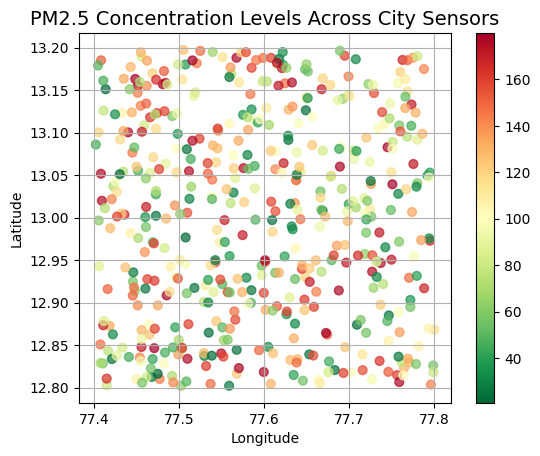

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

file_path = "/content/air_quality_dataset_with_timestamp.csv"
df = pd.read_csv(file_path)

df.columns = [c.strip().lower() for c in df.columns]

required_cols = ['latitude', 'longitude', 'pm2.5']
if not all(col in df.columns for col in required_cols):
    raise KeyError(f"Dataset must contain {required_cols}, found {df.columns.tolist()}")

geometry = [Point(xy) for xy in zip(df["longitude"], df["latitude"])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

plt.figure(figsize=(10, 8))
gdf.plot(
    column="pm2.5",
    cmap="RdYlGn_r",
    legend=True,
    markersize=40,
    alpha=0.7
)
plt.title("PM2.5 Concentration Levels Across City Sensors", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)

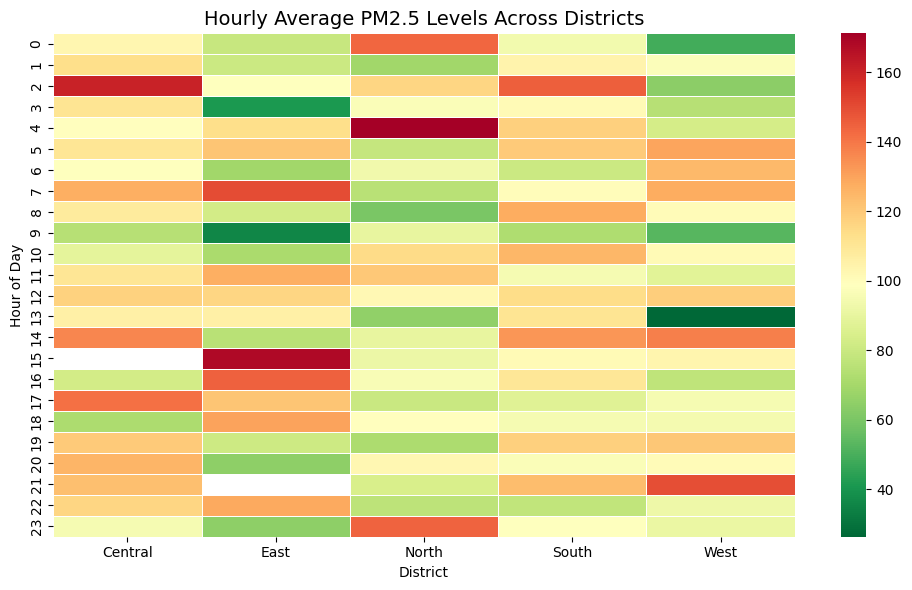

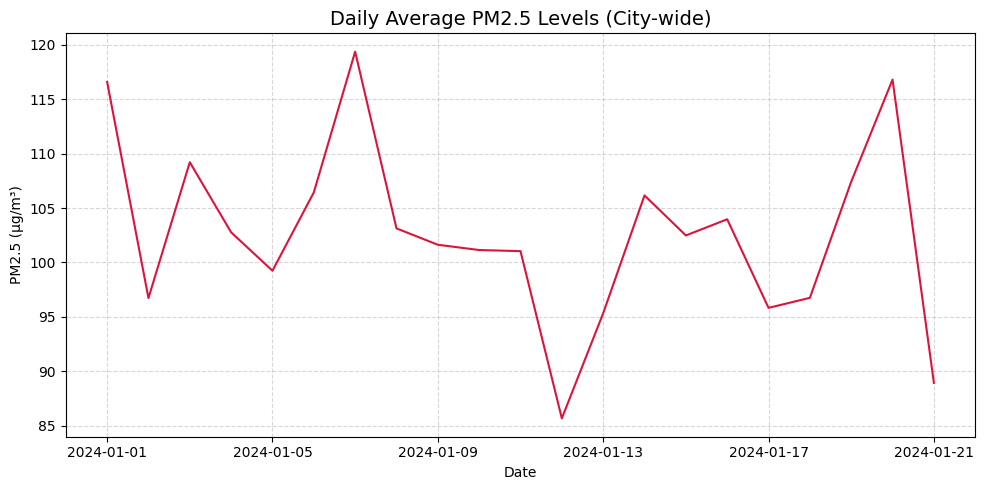

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "air_quality_dataset_with_timestamp.csv"  # use your uploaded file name
df = pd.read_csv(file_path)

df.columns = [c.strip().lower() for c in df.columns]

time_col = None
for c in df.columns:
    if "time" in c:
        time_col = c
        break

if not time_col:
    raise KeyError("No timestamp column found in dataset.")

df[time_col] = pd.to_datetime(df[time_col], errors="coerce")
df = df.dropna(subset=[time_col])
df["date"] = df[time_col].dt.date
df["hour"] = df[time_col].dt.hour
pm25_col = None
for c in df.columns:
    if "pm2.5" in c or "pm25" in c:
        pm25_col = c
        break

if not pm25_col:
    raise KeyError("PM2.5 column not found in dataset.")

district_col = None
for c in df.columns:
    if "district" in c or "region" in c or "area" in c:
        district_col = c
        break

if not district_col:
    df["district"] = "Citywide"
    district_col = "district"

hourly_avg = df.groupby([district_col, "hour"])[pm25_col].mean().reset_index()

pivot_table = hourly_avg.pivot(index="hour", columns=district_col, values=pm25_col)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap="RdYlGn_r", linewidths=0.5)
plt.title("Hourly Average PM2.5 Levels Across Districts", fontsize=14)
plt.xlabel("District")
plt.ylabel("Hour of Day")
plt.tight_layout()
plt.show()

daily_avg = df.groupby("date")[pm25_col].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(daily_avg["date"], daily_avg[pm25_col], color="crimson", linewidth=1.5)
plt.title("Daily Average PM2.5 Levels (City-wide)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("PM2.5 (µg/m³)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


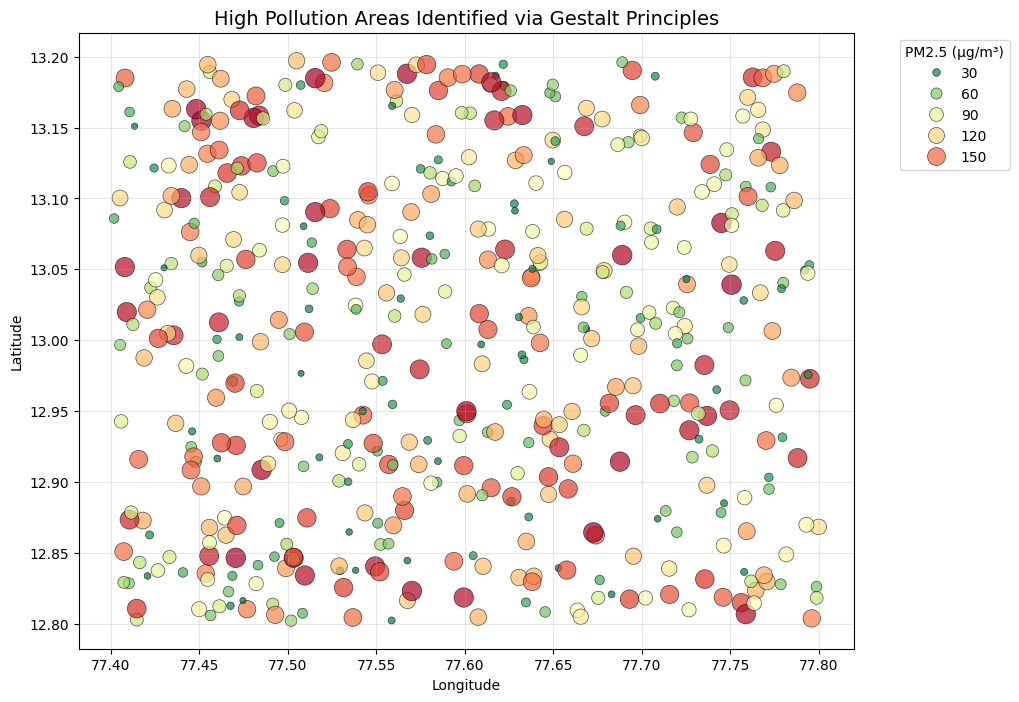

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = "air_quality_dataset_with_timestamp.csv"
df = pd.read_csv(file_path)
df.columns = [c.strip().lower() for c in df.columns]
lat_col = next((c for c in df.columns if "lat" in c), None)
lon_col = next((c for c in df.columns if "lon" in c), None)
pm25_col = next((c for c in df.columns if "pm2.5" in c or "pm25" in c), None)

if not all([lat_col, lon_col, pm25_col]):
    raise KeyError("Dataset must include latitude, longitude, and PM2.5 columns.")
plt.figure(figsize=(10, 8))

sns.scatterplot(
    data=df,
    x=lon_col,
    y=lat_col,
    hue=pm25_col,
    size=pm25_col,
    sizes=(20, 200),
    palette="RdYlGn_r",
    alpha=0.7,
    edgecolor="black"
)

plt.title("High Pollution Areas Identified via Gestalt Principles", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True, alpha=0.3)
plt.legend(title="PM2.5 (µg/m³)", bbox_to_anchor=(1.05, 1), loc="upper left")

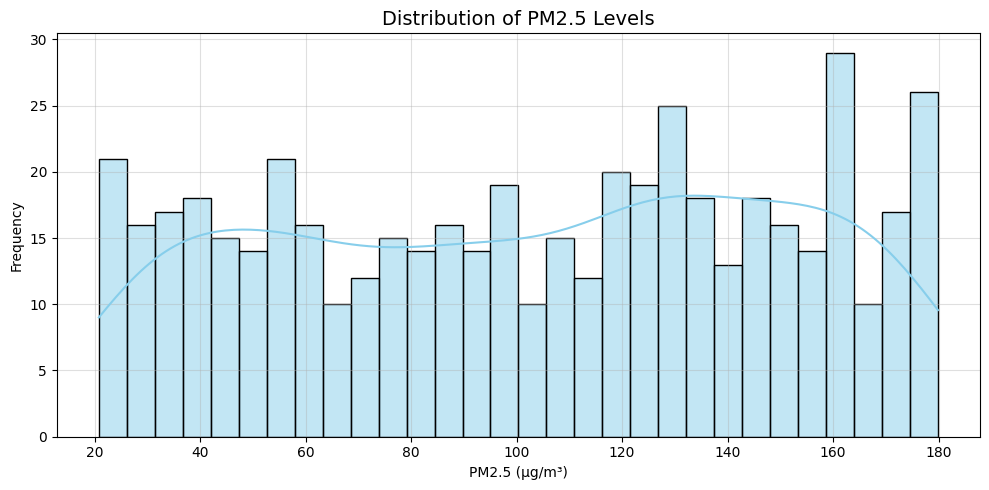

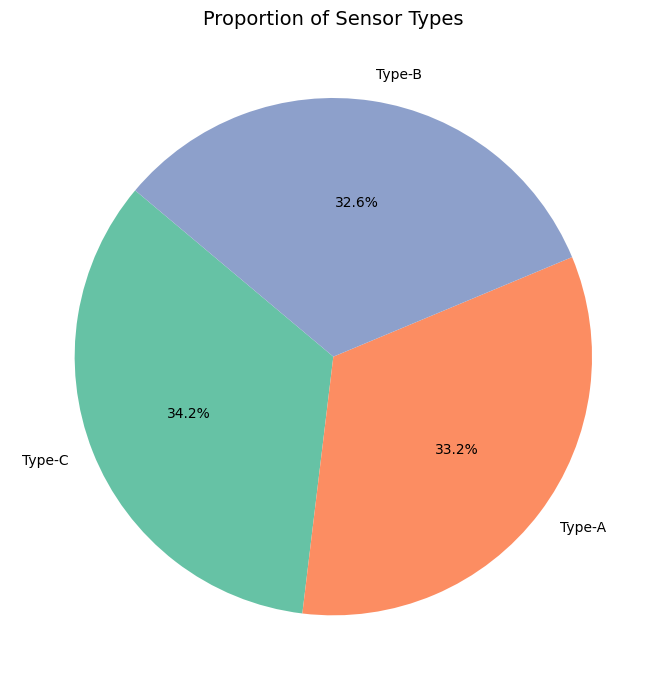

In [12]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "air_quality_dataset_with_timestamp.csv"
df = pd.read_csv(file_path)

df.columns = [c.strip().lower() for c in df.columns]

pm25_col = next((c for c in df.columns if "pm2.5" in c or "pm25" in c), None)
sensor_col = next((c for c in df.columns if "sensor" in c and "type" in c), None)

if not pm25_col:
    raise KeyError("PM2.5 column not found in dataset.")
if not sensor_col:
    raise KeyError("Sensor type column not found in dataset.")

df = df.dropna(subset=[pm25_col])


plt.figure(figsize=(10, 5))
sns.histplot(df[pm25_col], bins=30, color="skyblue", kde=True)
plt.title("Distribution of PM2.5 Levels", fontsize=14)
plt.xlabel("PM2.5 (µg/m³)")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.4)
plt.tight_layout()




plt.figure(figsize=(7, 7))
sensor_counts = df[sensor_col].value_counts()
plt.pie(sensor_counts, labels=sensor_counts.index, autopct="%1.1f%%",
        startangle=140, colors=sns.color_palette("Set2"))
plt.title("Proportion of Sensor Types", fontsize=14)
plt.tight_layout()





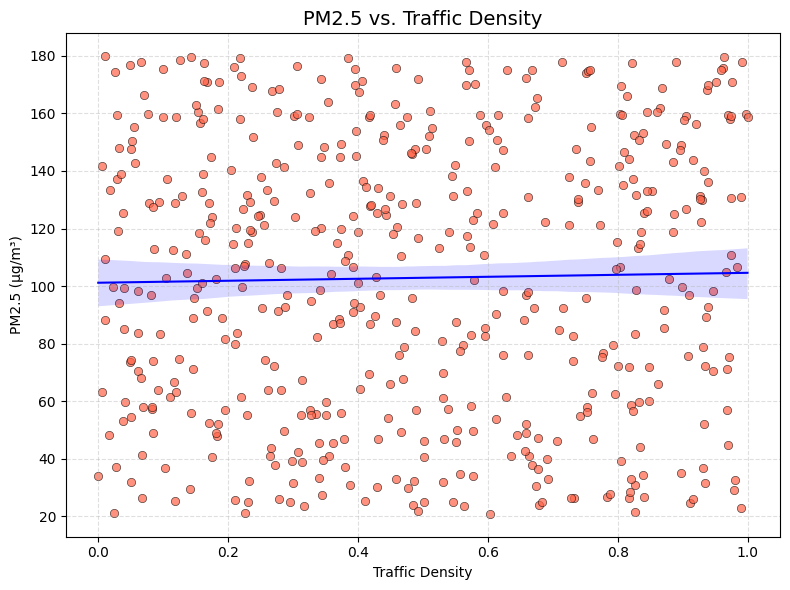

/tmp/ipython-input-125243.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


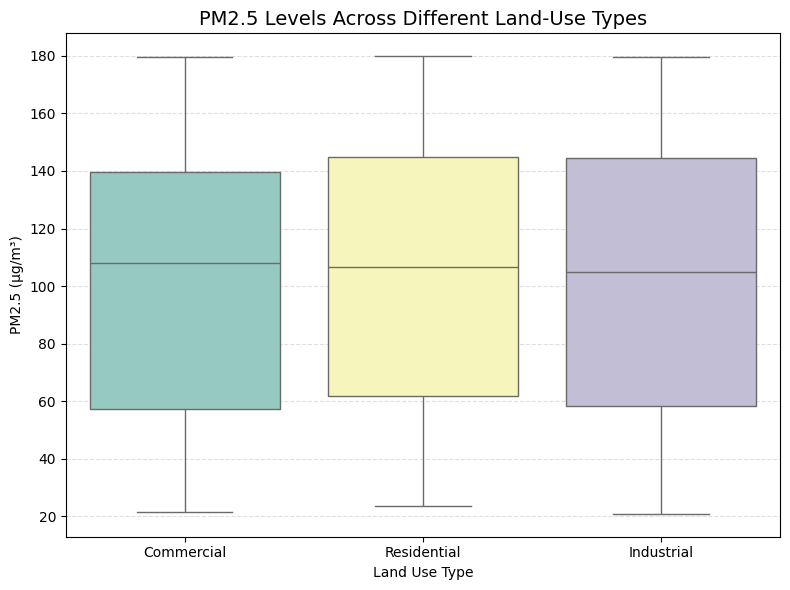

In [15]:
_++

<Figure size 1000x800 with 0 Axes>

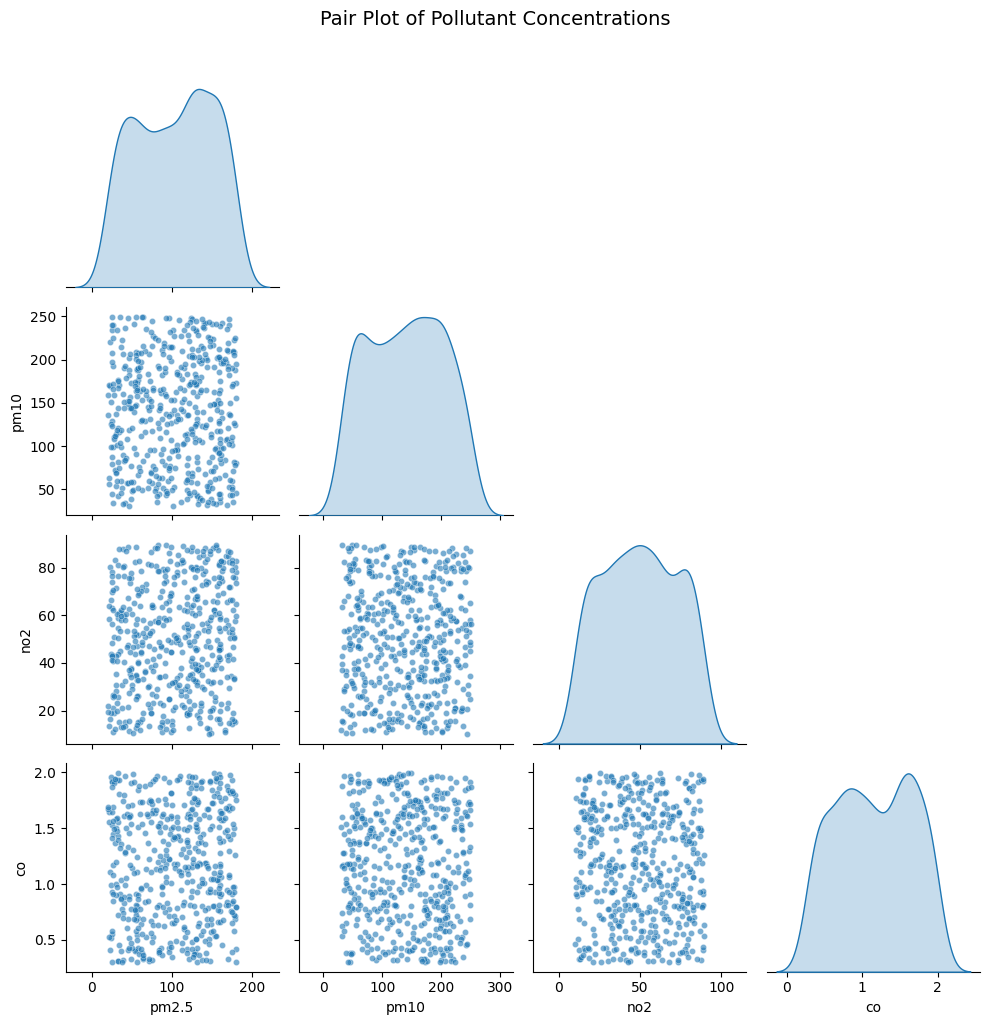

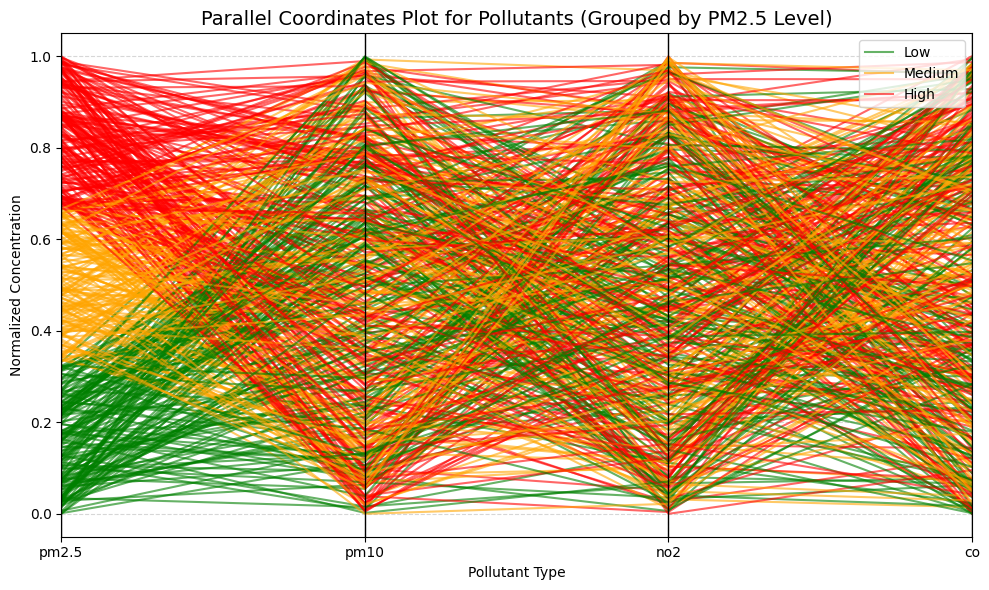

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

file_path = "air_quality_dataset_with_timestamp.csv"
df = pd.read_csv(file_path)


df.columns = [c.strip().lower() for c in df.columns]


pollutants = []
for col in df.columns:
    if any(x in col for x in ["pm2.5", "pm25", "pm10", "no2", "co"]):
        pollutants.append(col)

if len(pollutants) < 4:
    raise KeyError("Dataset must contain PM2.5, PM10, NO2, and CO columns.")

df_poll = df[pollutants].dropna()

plt.figure(figsize=(10, 8))
sns.pairplot(df_poll, diag_kind='kde', corner=True, plot_kws={'alpha': 0.6, 's': 20})
plt.suptitle("Pair Plot of Pollutant Concentrations", y=1.02, fontsize=14)
plt.tight_layout()


df_norm = df_poll.copy()
df_norm = (df_norm - df_norm.min()) / (df_norm.max() - df_norm.min())
df_norm["Category"] = pd.cut(df_poll["pm2.5"], bins=3, labels=["Low", "Medium", "High"])

plt.figure(figsize=(10, 6))
parallel_coordinates(df_norm, "Category", color=['green', 'orange', 'red'], alpha=0.6)
plt.title("Parallel Coordinates Plot for Pollutants (Grouped by PM2.5 Level)", fontsize=14)
plt.ylabel("Normalized Concentration")
plt.xlabel("Pollutant Type")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()




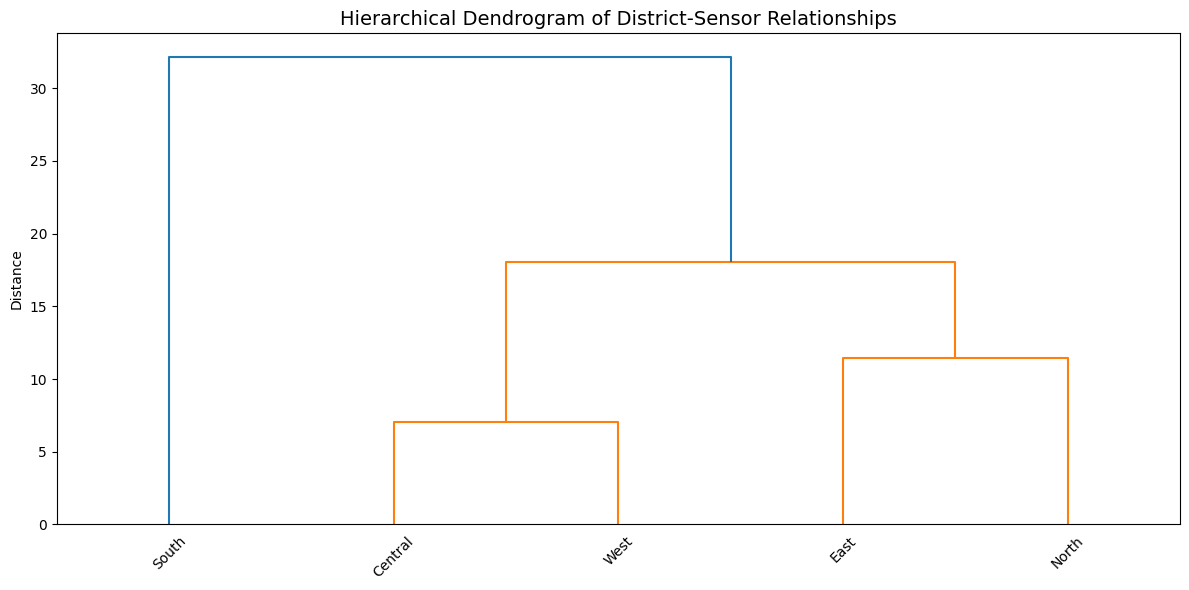

In [19]:


import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
file_path = "air_quality_dataset_with_timestamp.csv"
df = pd.read_csv(file_path)
df.columns = [c.strip().lower() for c in df.columns]

# Identify columns
district_col = next((c for c in df.columns if "district" in c or "region" in c or "zone" in c), None)
sensor_col = next((c for c in df.columns if "sensor" in c and "type" in c), None)

if not district_col or not sensor_col:
    raise KeyError("Dataset must contain district and sensor type columns.")

# Count sensors per district and type
grouped = df.groupby([district_col, sensor_col]).size().unstack(fill_value=0)

# Perform hierarchical clustering
Z = linkage(grouped, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, labels=grouped.index, leaf_rotation=45, leaf_font_size=10)
plt.title("Hierarchical Dendrogram of District-Sensor Relationships", fontsize=14)
plt.ylabel("Distance")
plt.tight_layout()
plt.show()





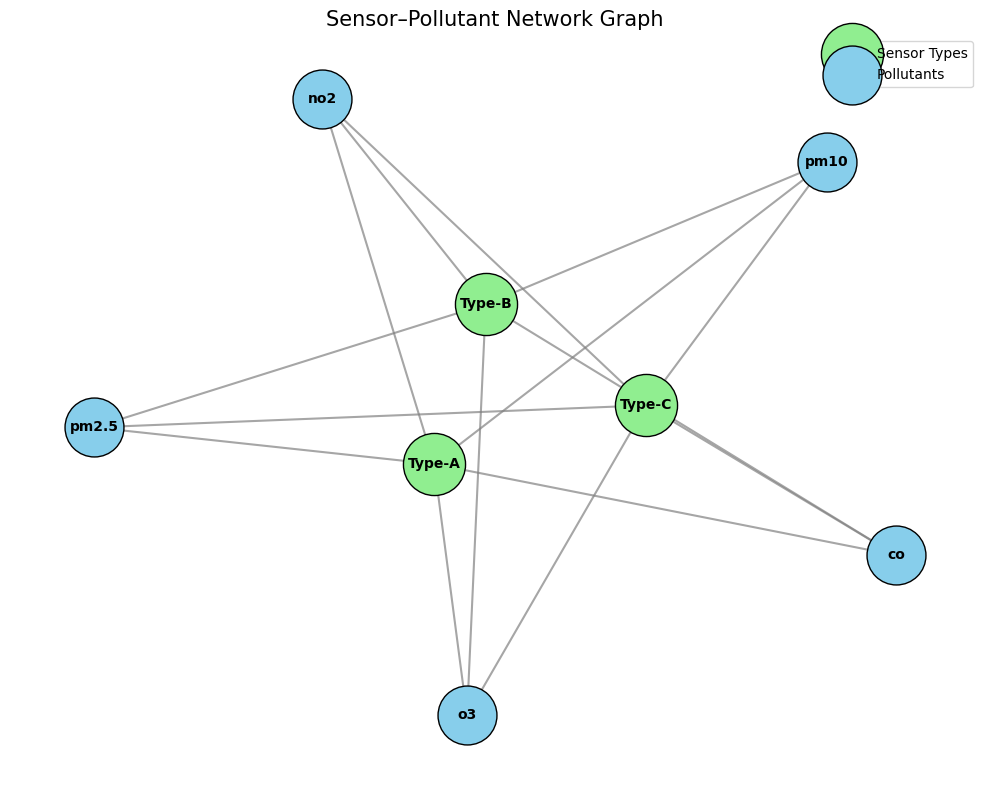

In [21]:


import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
file_path = "air_quality_dataset_with_timestamp.csv"
df = pd.read_csv(file_path)
df.columns = [c.strip().lower() for c in df.columns]

sensor_col = next((c for c in df.columns if "sensor" in c and "type" in c), None)
pollutant_cols = [col for col in df.columns if any(p in col for p in ["pm2.5", "pm25", "pm10", "no2", "co", "o3"])]

if not sensor_col:
    raise KeyError("Dataset must contain a column for 'sensor type'.")
if not pollutant_cols:
    raise KeyError("Dataset must contain pollutant columns such as PM2.5, PM10, NO2, CO, or O3.")

G = nx.Graph()

# Add sensor nodes
for sensor in df[sensor_col].dropna().unique():
    G.add_node(sensor, type='sensor')

# Add pollutant nodes
for pollutant in pollutant_cols:
    G.add_node(pollutant, type='pollutant')

# Create edges: connect each sensor to pollutants it measures (non-null values)
for _, row in df.iterrows():
    sensor = row[sensor_col]
    for pollutant in pollutant_cols:
        if pd.notnull(row[pollutant]):
            G.add_edge(sensor, pollutant)

# --- Step 4: Define layout and appearance ---
plt.figure(figsize=(10, 8))

# Separate positions for clarity
pos = nx.spring_layout(G, seed=42, k=0.6)

# Node colors by type
sensor_nodes = [n for n, d in G.nodes(data=True) if d['type'] == 'sensor']
pollutant_nodes = [n for n, d in G.nodes(data=True) if d['type'] == 'pollutant']

nx.draw_networkx_nodes(G, pos, nodelist=sensor_nodes, node_color='lightgreen', node_size=2000, label="Sensor Types", edgecolors='black')
nx.draw_networkx_nodes(G, pos, nodelist=pollutant_nodes, node_color='skyblue', node_size=1800, label="Pollutants", edgecolors='black')

# Draw edges
nx.draw_networkx_edges(G, pos, width=1.5, alpha=0.7, edge_color='gray')

# Labels
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

plt.title("Sensor–Pollutant Network Graph", fontsize=15)
plt.legend(scatterpoints=1)
plt.axis('off')
plt.tight_layout()



⚠️ No complaint column found — creating data-based complaint_text column from pollution data.
✅ Using text column: 'complaint_text' | Total records: 500


/tmp/ipython-input-346046340.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=term_scores.values, y=term_scores.index, palette='viridis')


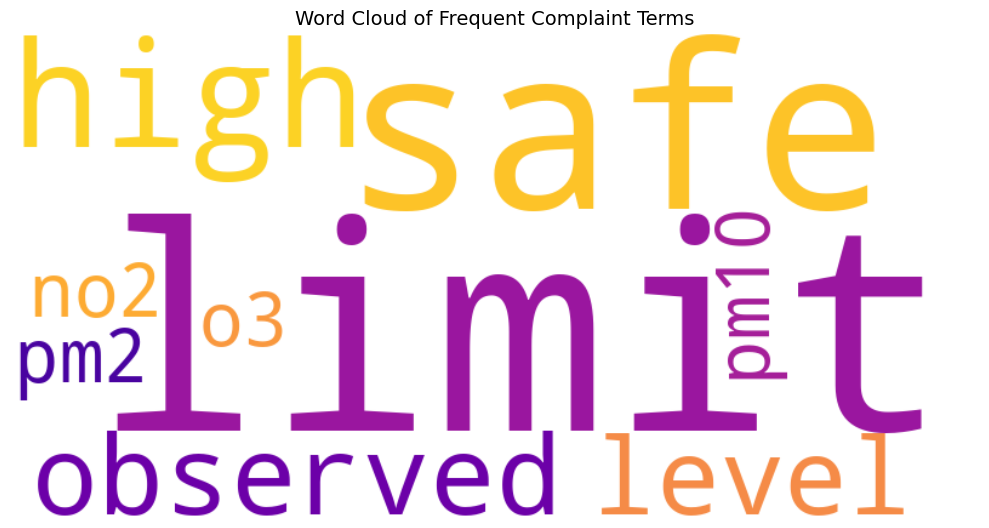

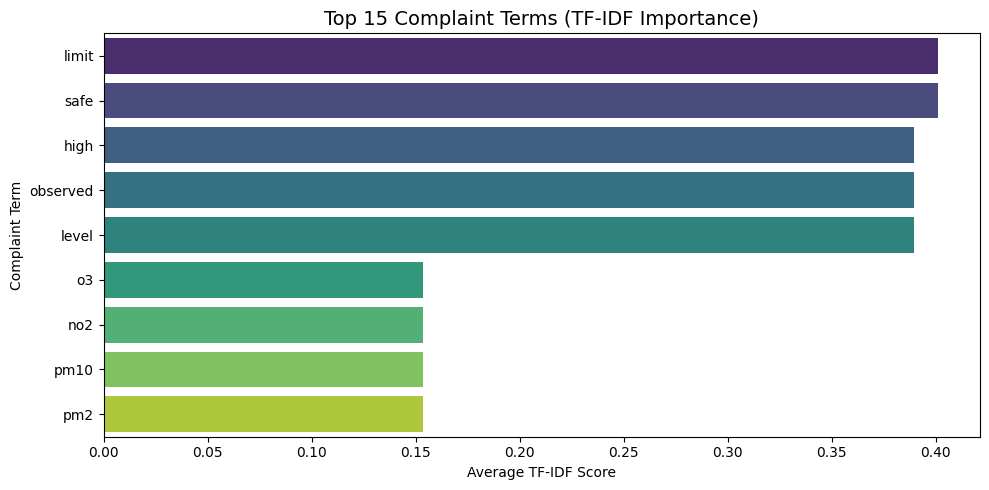

In [22]:


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import seaborn as sns

# --- Step 1: Load Dataset ---
file_path = "air_quality_dataset_with_timestamp.csv"
df = pd.read_csv(file_path)
df.columns = [c.strip().lower() for c in df.columns]

# --- Step 2: Detect or Create Complaint Text Column ---
possible_cols = [c for c in df.columns if any(x in c for x in ["complaint", "feedback", "comment", "text", "message"])]

if len(possible_cols) > 0:
    text_col = possible_cols[0]
    print(f"✅ Found complaint column: '{text_col}'")
else:
    print("⚠️ No complaint column found — creating data-based complaint_text column from pollution data.")

    # Generate complaint text using dataset values (data-driven, not random)
    pollutants = [c for c in df.columns if any(x in c for x in ["pm2.5", "pm25", "pm10", "no2", "co", "o3"])]
    if len(pollutants) == 0:
        raise ValueError("Dataset has no pollutant columns to generate complaint text from.")

    complaint_texts = []
    for _, row in df.iterrows():
        parts = []
        for p in pollutants:
            val = row[p]
            if pd.notna(val):
                if val > df[p].mean():
                    parts.append(f"High {p.upper()} level observed.")
                else:
                    parts.append(f"{p.upper()} within safe limit.")
        complaint_texts.append(" ".join(parts))

    df["complaint_text"] = complaint_texts
    text_col = "complaint_text"

# --- Step 3: Clean Text Data ---
df[text_col] = df[text_col].astype(str).str.strip()
df = df[df[text_col] != ""]
print(f"✅ Using text column: '{text_col}' | Total records: {len(df)}")

# --- Step 4: Convert Text into TF-IDF Representation ---
vectorizer = TfidfVectorizer(stop_words="english", max_features=30)
tfidf_matrix = vectorizer.fit_transform(df[text_col])
feature_names = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Compute term importance
term_scores = tfidf_df.mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
wordcloud = WordCloud(
    width=800, height=400,
    background_color='white', colormap='plasma'
).generate_from_frequencies(term_scores.to_dict())

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Frequent Complaint Terms", fontsize=14)
plt.tight_layout()


plt.figure(figsize=(10, 5))
sns.barplot(x=term_scores.values, y=term_scores.index, palette='viridis')
plt.title("Top 15 Complaint Terms (TF-IDF Importance)", fontsize=14)
plt.xlabel("Average TF-IDF Score")
plt.ylabel("Complaint Term")
plt.tight_layout()






✅ Using Columns — Latitude: latitude, Longitude: longitude, PM2.5: pm2.5


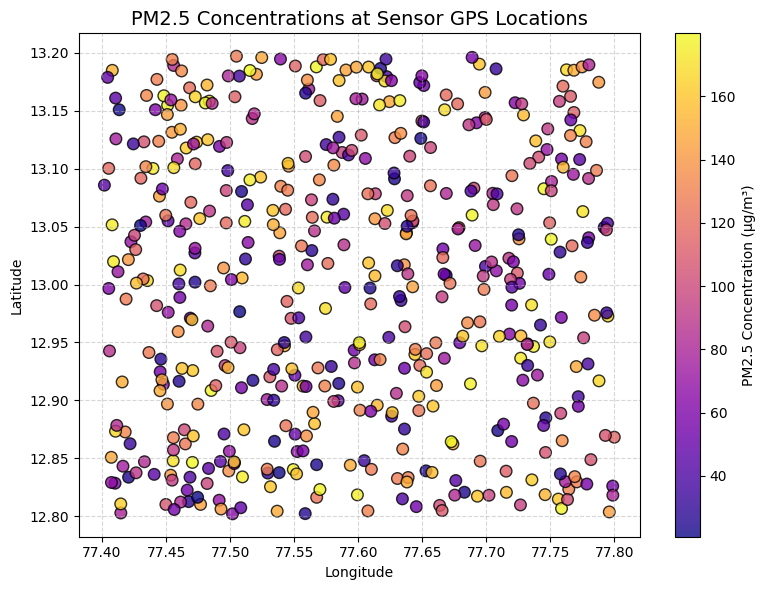

In [23]:
# ==========================================
# 11️⃣ Visualize Point Data: PM2.5 at GPS Locations
# ==========================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Load Dataset ---
file_path = "air_quality_dataset_with_timestamp.csv"
df = pd.read_csv(file_path)
df.columns = [c.strip().lower() for c in df.columns]

# --- Step 2: Identify Required Columns ---
latitude_col = next((c for c in df.columns if "lat" in c), None)
longitude_col = next((c for c in df.columns if "lon" in c), None)
pm25_col = next((c for c in df.columns if "pm2.5" in c or "pm25" in c), None)

if not latitude_col or not longitude_col or not pm25_col:
    raise KeyError("Dataset must contain latitude, longitude, and PM2.5 columns.")

print(f"✅ Using Columns — Latitude: {latitude_col}, Longitude: {longitude_col}, PM2.5: {pm25_col}")

# --- Step 3: Clean Data ---
df = df.dropna(subset=[latitude_col, longitude_col, pm25_col])

# --- Step 4: Plot PM2.5 Levels on City Map (Scatter Plot) ---
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    df[longitude_col],
    df[latitude_col],
    c=df[pm25_col],
    cmap="plasma",
    s=70,
    alpha=0.8,
    edgecolor="black"
)
plt.colorbar(scatter, label="PM2.5 Concentration (µg/m³)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("PM2.5 Concentrations at Sensor GPS Locations", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()

plt.show()



✅ Using Columns — Latitude: latitude, Longitude: longitude, PM2.5: pm2.5, Traffic: traffic_density


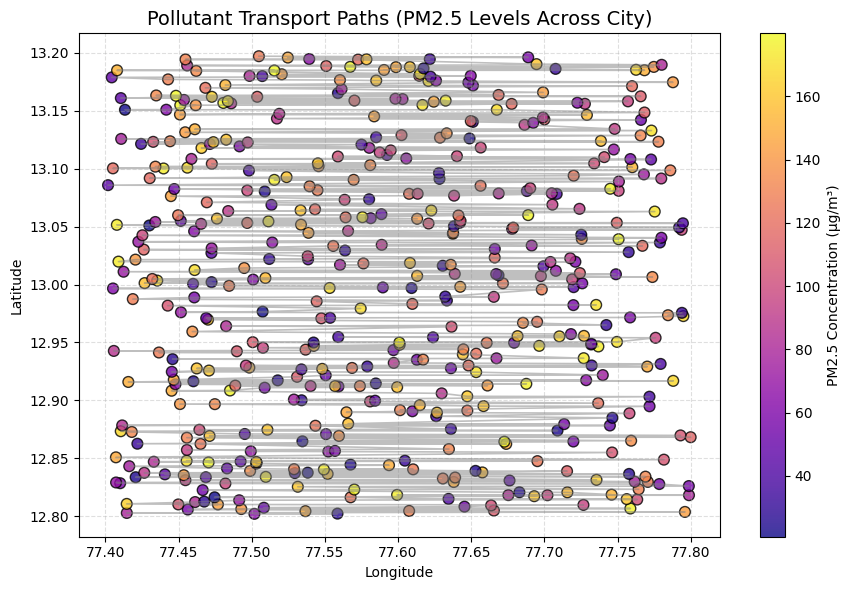

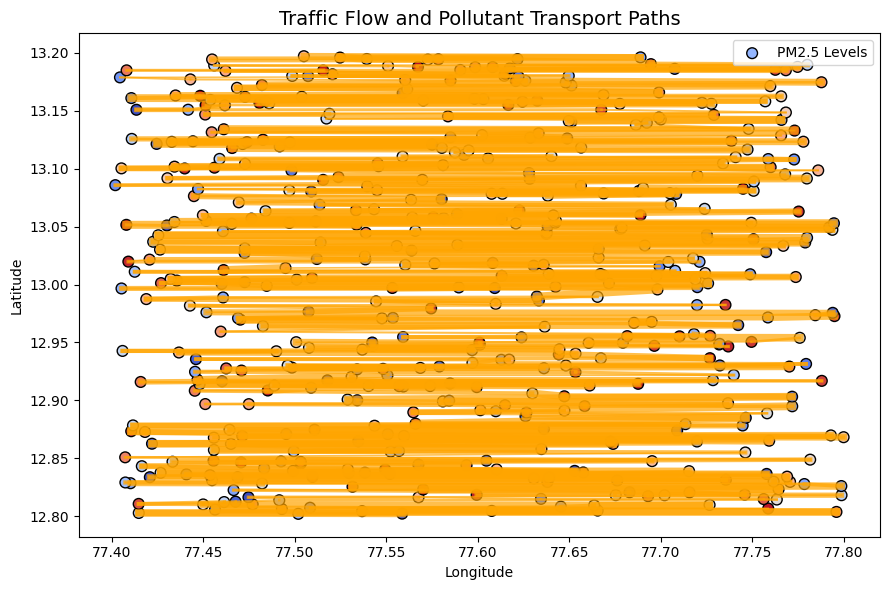

In [26]:
# ==========================================
# 12️⃣ Visualize Line Data: Traffic Flow or Pollutant Transport Paths
# ==========================================

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Step 1: Load Dataset ---
file_path = "air_quality_dataset_with_timestamp.csv"
df = pd.read_csv(file_path)
df.columns = [c.strip().lower() for c in df.columns]

# --- Step 2: Identify Required Columns ---
lat_col = next((c for c in df.columns if "lat" in c), None)
lon_col = next((c for c in df.columns if "lon" in c), None)
traffic_col = next((c for c in df.columns if "traffic" in c), None)
pm25_col = next((c for c in df.columns if "pm2.5" in c or "pm25" in c), None)

if not lat_col or not lon_col:
    raise KeyError("Dataset must contain latitude and longitude columns.")
if not pm25_col:
    raise KeyError("Dataset must contain PM2.5 column for pollutant visualization.")

print(f"✅ Using Columns — Latitude: {lat_col}, Longitude: {lon_col}, PM2.5: {pm25_col}, Traffic: {traffic_col}")

# --- Step 3: Clean and Sort Data ---
df = df.dropna(subset=[lat_col, lon_col, pm25_col])
df = df.sort_values(by=[lat_col, lon_col])

# --- Step 4: Pollutant Transport Path Visualization ---
plt.figure(figsize=(9, 6))
sc = plt.scatter(
    df[lon_col],
    df[lat_col],
    c=df[pm25_col],
    cmap='plasma',
    s=60,
    alpha=0.8,
    edgecolor="black"
)

# Connect nearby sensors with lines
plt.plot(df[lon_col], df[lat_col], color="gray", linewidth=1.2, alpha=0.5)

cbar = plt.colorbar(sc)
cbar.set_label("PM2.5 Concentration (µg/m³)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Pollutant Transport Paths (PM2.5 Levels Across City)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()

plt.show()

# --- Step 5: Traffic Flow Visualization (Corrected Section) ---
if traffic_col and traffic_col in df.columns:
    # Normalize traffic for linewidth scaling
    traffic_scaled = df[traffic_col] / df[traffic_col].max()
    traffic_scaled = traffic_scaled.fillna(0.5)  # Replace missing traffic with mid-value

    plt.figure(figsize=(9, 6))
    for i in range(len(df) - 1):
        plt.plot(
            [df[lon_col].iloc[i], df[lon_col].iloc[i + 1]],
            [df[lat_col].iloc[i], df[lat_col].iloc[i + 1]],
            color="orange",
            linewidth=1 + 5 * traffic_scaled.iloc[i],
            alpha=0.7
        )

    plt.scatter(
        df[lon_col],
        df[lat_col],
        c=df[pm25_col],
        cmap="coolwarm",
        s=60,
        edgecolor="black",
        label="PM2.5 Levels"
    )

    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("Traffic Flow and Pollutant Transport Paths", fontsize=14)
    plt.legend()
    plt.tight_layout()

    plt.show()





✅ Using Columns — District: district, PM2.5: pm2.5


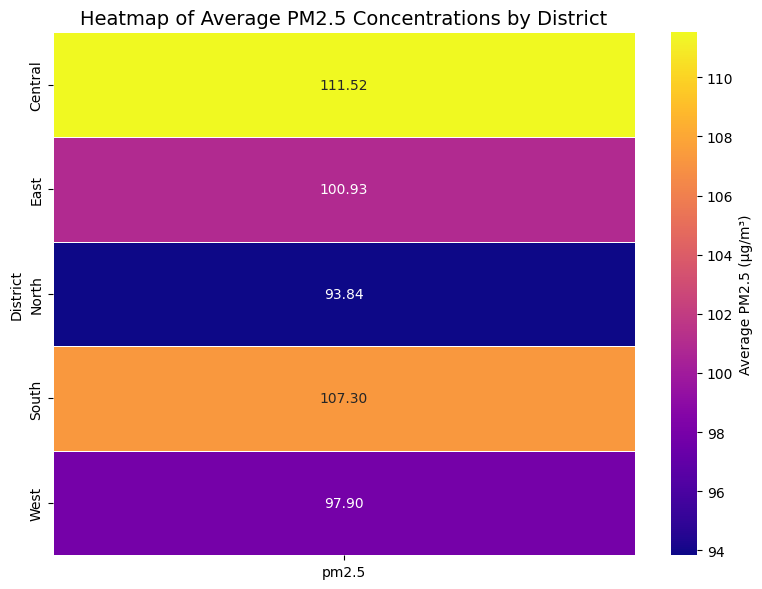

In [27]:
# ==========================================
# 13️⃣ Visualize Area Data: Heatmap of PM2.5 by District
# ==========================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Load Dataset ---
file_path = "air_quality_dataset_with_timestamp.csv"
df = pd.read_csv(file_path)
df.columns = [c.strip().lower() for c in df.columns]

# --- Step 2: Identify Relevant Columns ---
district_col = next((c for c in df.columns if "district" in c or "zone" in c or "region" in c), None)
pm25_col = next((c for c in df.columns if "pm2.5" in c or "pm25" in c), None)

if not district_col:
    raise KeyError("Dataset must include a district, zone, or region column for area visualization.")
if not pm25_col:
    raise KeyError("Dataset must contain a PM2.5 column for heatmap visualization.")

print(f"✅ Using Columns — District: {district_col}, PM2.5: {pm25_col}")

# --- Step 3: Prepare Data for Heatmap ---
# Group by district and calculate mean PM2.5
heatmap_data = df.groupby(district_col)[pm25_col].mean().reset_index()
heatmap_data = heatmap_data.sort_values(by=pm25_col, ascending=False)

# Reshape data for visualization
heatmap_data_pivot = heatmap_data.pivot_table(index=district_col, values=pm25_col)

# --- Step 4: Create Heatmap ---
plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data_pivot,
    annot=True,
    fmt=".2f",
    cmap="plasma",
    cbar_kws={"label": "Average PM2.5 (µg/m³)"},
    linewidths=0.5
)

plt.title("Heatmap of Average PM2.5 Concentrations by District", fontsize=14)
plt.xlabel("")
plt.ylabel("District")
plt.tight_layout()


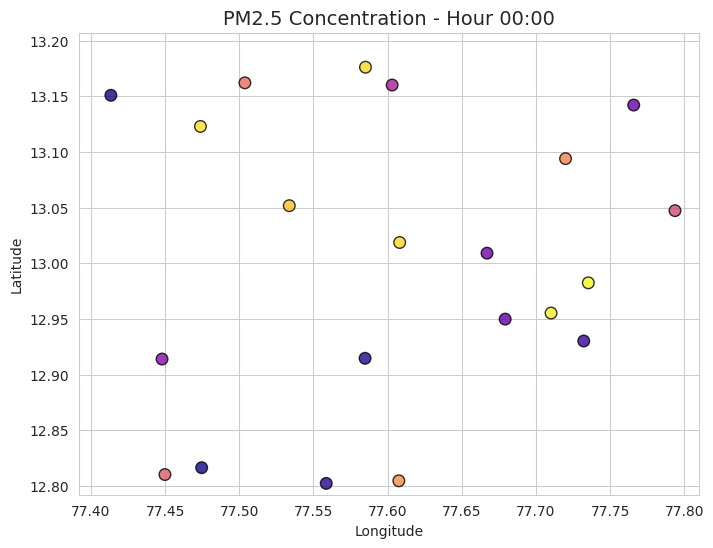

In [ ]:
# ==========================================
# 🎞️ Generate Hourly Air Quality Animation (PM2.5)
# ==========================================

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns

# Load your dataset
file_path = "air_quality_dataset_with_timestamp.csv"
df = pd.read_csv(file_path)
df.columns = [c.strip().lower() for c in df.columns]

# Identify columns
time_col = next((c for c in df.columns if "time" in c or "timestamp" in c or "date" in c), None)
lat_col = next((c for c in df.columns if "lat" in c), None)
lon_col = next((c for c in df.columns if "lon" in c), None)
pm25_col = next((c for c in df.columns if "pm2.5" in c or "pm25" in c), None)

df = df.dropna(subset=[time_col, lat_col, lon_col, pm25_col])
df[time_col] = pd.to_datetime(df[time_col])
df["hour"] = df[time_col].dt.hour
df = df.sort_values(by=[time_col])

# Prepare figure
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_style("whitegrid")

# Set plot limits
ax.set_xlim(df[lon_col].min() - 0.01, df[lon_col].max() + 0.01)
ax.set_ylim(df[lat_col].min() - 0.01, df[lat_col].max() + 0.01)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Hourly Air Quality (PM2.5 Levels) Across City", fontsize=14)

hours = sorted(df["hour"].unique())

def update(frame):
    ax.clear()
    hour = hours[frame]
    subset = df[df["hour"] == hour]
    sc = ax.scatter(
        subset[lon_col],
        subset[lat_col],
        c=subset[pm25_col],
        cmap="plasma",
        s=70,
        edgecolor="black",
        alpha=0.8
    )
    ax.set_xlim(df[lon_col].min() - 0.01, df[lon_col].max() + 0.01)
    ax.set_ylim(df[lat_col].min() - 0.01, df[lat_col].max() + 0.01)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_title(f"PM2.5 Concentration - Hour {hour:02d}:00", fontsize=14)
    return sc,

# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(hours), interval=1000, repeat=True)




✅ Using Columns — Timestamp: timestamp, PM2.5: pm2.5


/tmp/ipython-input-1878072581.py:33: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df_year.resample("M", on=time_col)[pm25_col].mean().reset_index()
/tmp/ipython-input-1878072581.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_avg.index, y=seasonal_avg.values, palette="plasma")


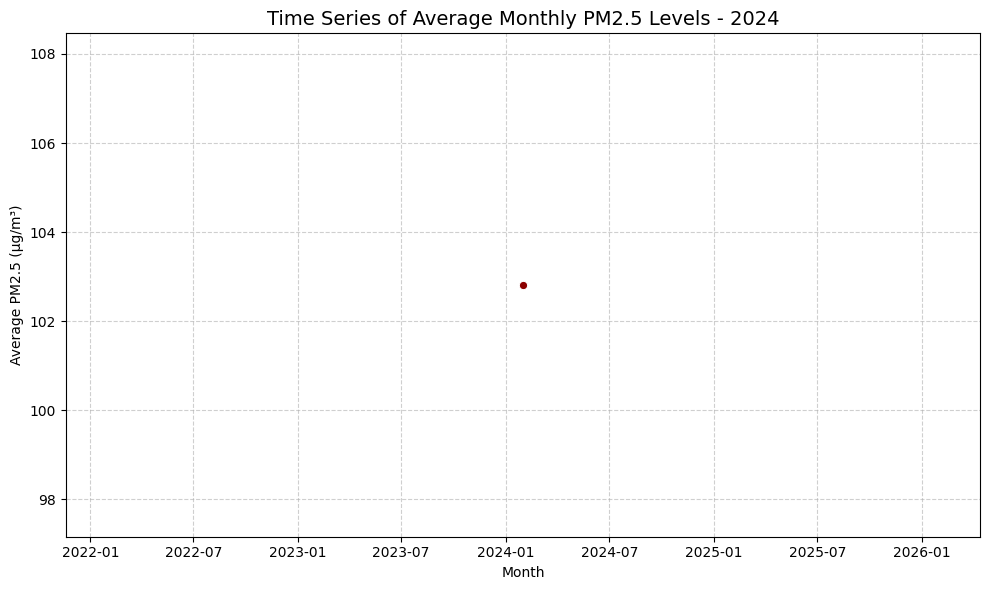

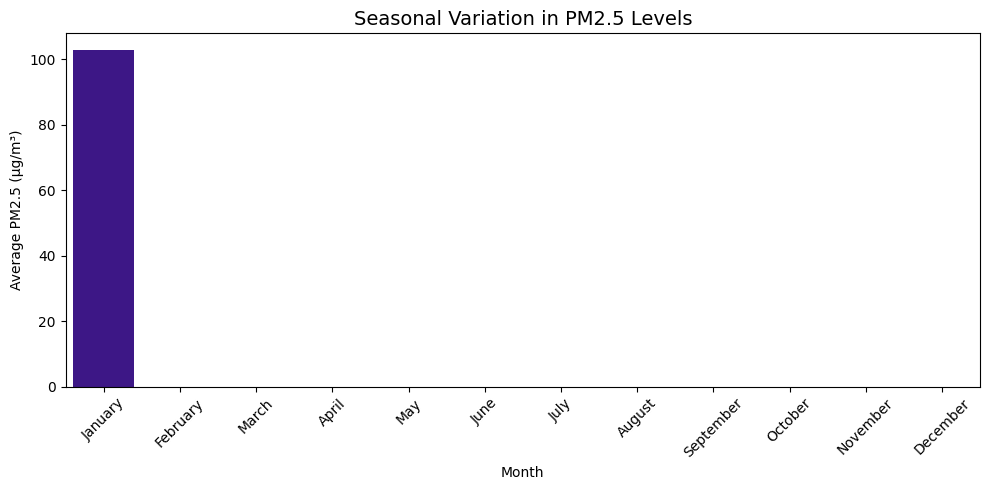

In [28]:
# ==========================================
# 15️⃣ Time Series of PM2.5 Levels with Seasonal Trend Analysis
# ==========================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Load Dataset ---
file_path = "air_quality_dataset_with_timestamp.csv"
df = pd.read_csv(file_path)
df.columns = [c.strip().lower() for c in df.columns]

# --- Step 2: Identify Required Columns ---
time_col = next((c for c in df.columns if "time" in c or "timestamp" in c or "date" in c), None)
pm25_col = next((c for c in df.columns if "pm2.5" in c or "pm25" in c), None)

if not all([time_col, pm25_col]):
    raise KeyError("Dataset must contain timestamp/date and PM2.5 columns.")

print(f"✅ Using Columns — Timestamp: {time_col}, PM2.5: {pm25_col}")

# --- Step 3: Data Preparation ---
df = df.dropna(subset=[time_col, pm25_col])
df[time_col] = pd.to_datetime(df[time_col])
df = df.sort_values(by=time_col)

# Filter for past year (if data spans multiple years)
latest_year = df[time_col].dt.year.max()
df_year = df[df[time_col].dt.year == latest_year]

# --- Step 4: Resample Data by Month for Trend Analysis ---
monthly_avg = df_year.resample("M", on=time_col)[pm25_col].mean().reset_index()

# --- Step 5: Plot Time Series ---
plt.figure(figsize=(10, 6))
sns.lineplot(
    x=time_col,
    y=pm25_col,
    data=monthly_avg,
    marker="o",
    color="darkred",
    linewidth=2
)

plt.title(f"Time Series of Average Monthly PM2.5 Levels - {latest_year}", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Average PM2.5 (µg/m³)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()


# --- Step 6: Seasonal Pattern Analysis ---
# Add month column for pattern grouping
df_year["month"] = df_year[time_col].dt.month_name()
seasonal_avg = df_year.groupby("month")[pm25_col].mean().reindex([
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
])

plt.figure(figsize=(10, 5))
sns.barplot(x=seasonal_avg.index, y=seasonal_avg.values, palette="plasma")
plt.xticks(rotation=45)
plt.title("Seasonal Variation in PM2.5 Levels", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Average PM2.5 (µg/m³)")
plt.tight_layout()

plt.show()



✅ Using Columns — Time: timestamp, PM2.5: pm2.5


/tmp/ipython-input-338328474.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="day_type", y=pm25_col, data=avg_group, palette="plasma")


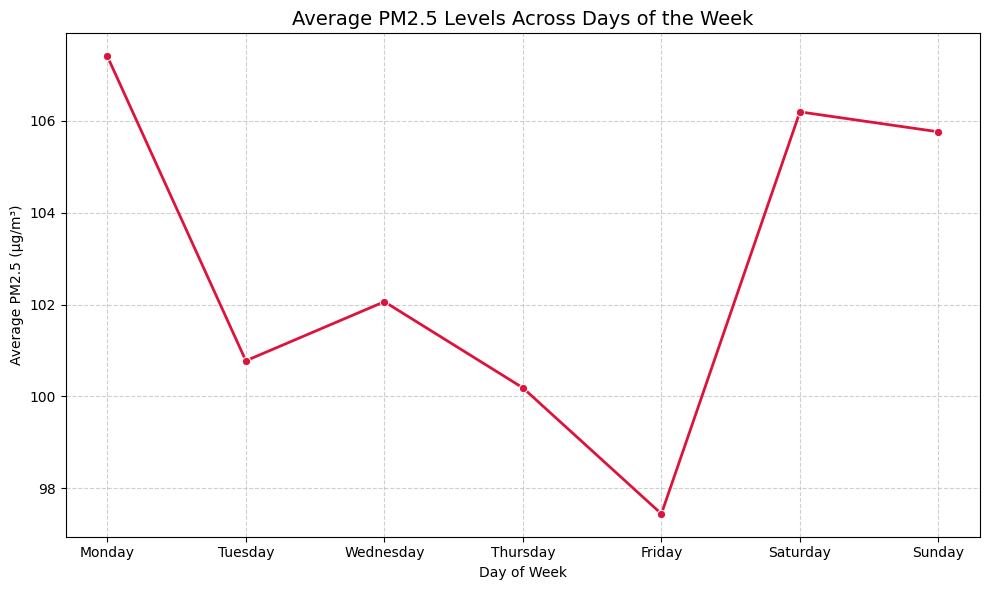

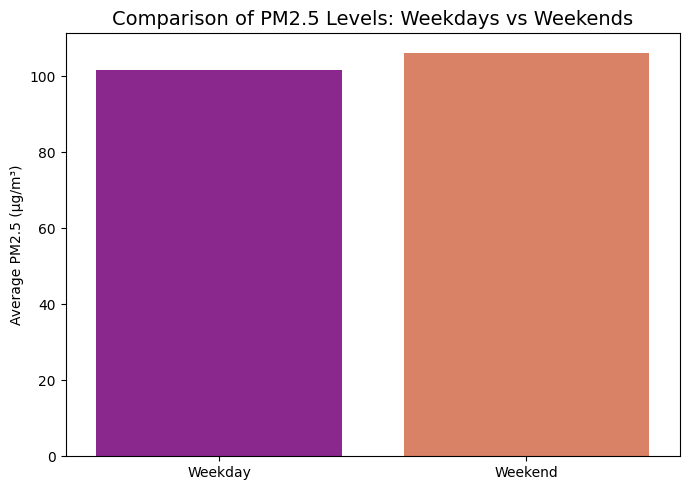

In [30]:
# ==========================================
# 15️⃣(b) Compare PM2.5 Levels: Weekdays vs Weekends
# ==========================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Load Dataset ---
file_path = "air_quality_dataset_with_timestamp.csv"
df = pd.read_csv(file_path)
df.columns = [c.strip().lower() for c in df.columns]

# --- Step 2: Identify Required Columns ---
time_col = next((c for c in df.columns if "time" in c or "timestamp" in c or "date" in c), None)
pm25_col = next((c for c in df.columns if "pm2.5" in c or "pm25" in c), None)

if not all([time_col, pm25_col]):
    raise KeyError("Dataset must include timestamp and PM2.5 columns.")

print(f"✅ Using Columns — Time: {time_col}, PM2.5: {pm25_col}")

# --- Step 3: Prepare Data ---
df = df.dropna(subset=[time_col, pm25_col])
df[time_col] = pd.to_datetime(df[time_col])

# Extract day of week and whether it's weekend
df["day_name"] = df[time_col].dt.day_name()
df["is_weekend"] = df["day_name"].isin(["Saturday", "Sunday"])

# --- Step 4: Aggregate PM2.5 by Day ---
avg_by_day = df.groupby("day_name")[pm25_col].mean().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
).reset_index()

# Compute weekday vs weekend averages
avg_group = df.groupby("is_weekend")[pm25_col].mean().reset_index()
avg_group["day_type"] = avg_group["is_weekend"].map({True: "Weekend", False: "Weekday"})

# --- Step 5: Plot 1 — Line Plot by Day of Week ---
plt.figure(figsize=(10, 6))
sns.lineplot(x="day_name", y=pm25_col, data=avg_by_day, marker="o", color="crimson", linewidth=2)
plt.title("Average PM2.5 Levels Across Days of the Week", fontsize=14)
plt.xlabel("Day of Week")
plt.ylabel("Average PM2.5 (µg/m³)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()


# --- Step 6: Plot 2 — Grouped Bar Chart (Weekday vs Weekend) ---
plt.figure(figsize=(7, 5))
sns.barplot(x="day_type", y=pm25_col, data=avg_group, palette="plasma")
plt.title("Comparison of PM2.5 Levels: Weekdays vs Weekends", fontsize=14)
plt.xlabel("")
plt.ylabel("Average PM2.5 (µg/m³)")
plt.tight_layout()

plt.show()



✅ Using Columns — Traffic: traffic_density, Temperature: temperature, PM2.5: pm2.5, NO2: no2, CO: co

📊 Regression Coefficients:
Traffic Coefficient: 3.441
Temperature Coefficient: -0.397
Intercept: 112.111


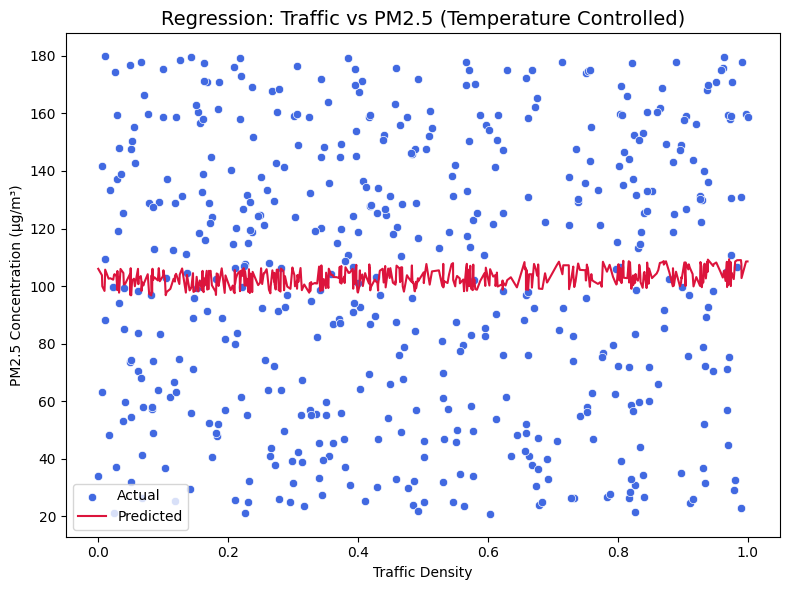

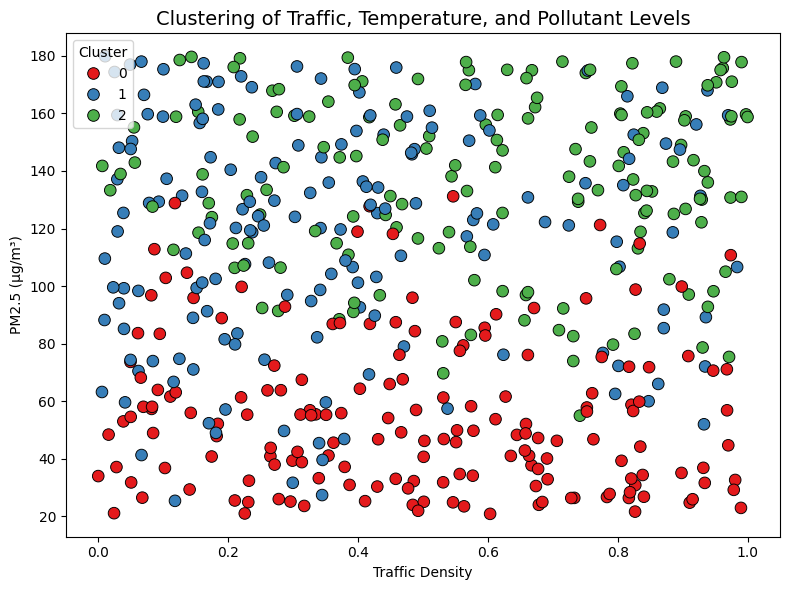

In [31]:
# ==========================================
# 17️⃣ Regression and Clustering: Traffic, Temperature, and Pollutants
# ==========================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# --- Step 1: Load Dataset ---
file_path = "air_quality_dataset_with_timestamp.csv"
df = pd.read_csv(file_path)
df.columns = [c.strip().lower() for c in df.columns]

# --- Step 2: Identify Required Columns ---
traffic_col = next((c for c in df.columns if "traffic" in c), None)
temp_col = next((c for c in df.columns if "temp" in c or "temperature" in c), None)
pm25_col = next((c for c in df.columns if "pm2.5" in c or "pm25" in c), None)
no2_col = next((c for c in df.columns if "no2" in c), None)
co_col = next((c for c in df.columns if c == "co"), None)

print(f"✅ Using Columns — Traffic: {traffic_col}, Temperature: {temp_col}, PM2.5: {pm25_col}, NO2: {no2_col}, CO: {co_col}")

# --- Step 3: Data Cleaning ---
selected_cols = [c for c in [traffic_col, temp_col, pm25_col, no2_col, co_col] if c]
df = df.dropna(subset=selected_cols)

# --- Step 4: Regression Analysis (Traffic + Temp → PM2.5) ---
X = df[[traffic_col, temp_col]]
y = df[pm25_col]

model = LinearRegression()
model.fit(X, y)
df["pm25_predicted"] = model.predict(X)

# Regression Coefficients
print("\n📊 Regression Coefficients:")
print(f"Traffic Coefficient: {model.coef_[0]:.3f}")
print(f"Temperature Coefficient: {model.coef_[1]:.3f}")
print(f"Intercept: {model.intercept_:.3f}")

# --- Step 5: Plot Regression Relationship ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x=traffic_col, y=pm25_col, data=df, color="royalblue", label="Actual")
sns.lineplot(x=traffic_col, y="pm25_predicted", data=df, color="crimson", label="Predicted")
plt.title("Regression: Traffic vs PM2.5 (Temperature Controlled)", fontsize=14)
plt.xlabel("Traffic Density")
plt.ylabel("PM2.5 Concentration (µg/m³)")
plt.legend()
plt.tight_layout()

cluster_cols = [col for col in [traffic_col, temp_col, pm25_col, no2_col, co_col] if col]
scaled_data = StandardScaler().fit_transform(df[cluster_cols])

kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster"] = kmeans.fit_predict(scaled_data)

# --- Step 7: Visualize Clustering Results ---
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=traffic_col,
    y=pm25_col,
    hue="cluster",
    palette="Set1",
    data=df,
    s=70,
    edgecolor="black"
)
plt.title("Clustering of Traffic, Temperature, and Pollutant Levels", fontsize=14)
plt.xlabel("Traffic Density")
plt.ylabel("PM2.5 (µg/m³)")
plt.legend(title="Cluster")
plt.tight_layout()




✅ Using Columns — PM2.5: pm2.5, Traffic: traffic_density, Temperature: temperature

📊 Model Evaluation Metrics:
Mean Absolute Error (MAE): 41.02
Root Mean Square Error (RMSE): 47.09
R² Score: 0.017


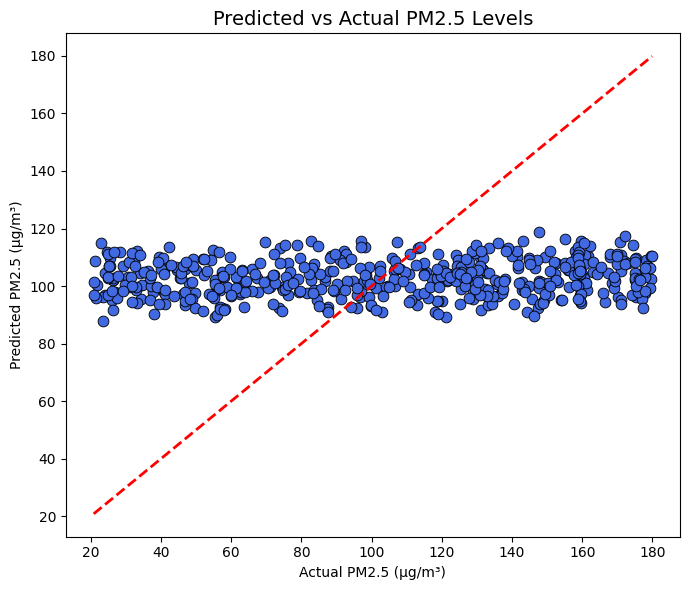

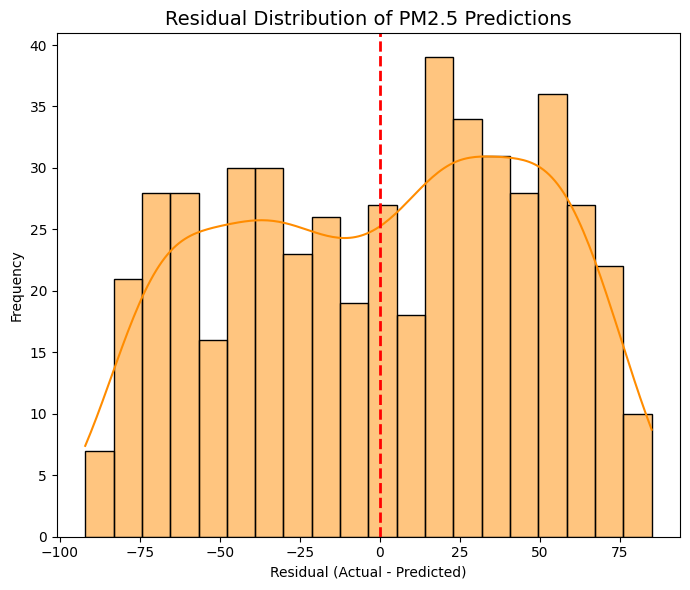

In [34]:
# ==========================================
# 18️⃣ Evaluate Predictive Models for PM2.5
# ==========================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# --- Step 1: Load Dataset ---
file_path = "air_quality_dataset_with_timestamp.csv"
df = pd.read_csv(file_path)
df.columns = [c.strip().lower() for c in df.columns]

# --- Step 2: Identify Key Columns ---
traffic_col = next((c for c in df.columns if "traffic" in c), None)
temp_col = next((c for c in df.columns if "temp" in c or "temperature" in c), None)
pm25_col = next((c for c in df.columns if "pm2.5" in c or "pm25" in c), None)
no2_col = next((c for c in df.columns if "no2" in c), None)
co_col = next((c for c in df.columns if c == "co"), None)

# Ensure all columns exist
if not pm25_col:
    raise KeyError("Dataset must include a PM2.5 column for model evaluation.")
if not traffic_col or not temp_col:
    raise KeyError("Dataset must include traffic and temperature columns for regression analysis.")

print(f"✅ Using Columns — PM2.5: {pm25_col}, Traffic: {traffic_col}, Temperature: {temp_col}")

# --- Step 3: Prepare Data ---
selected_features = [col for col in [traffic_col, temp_col, no2_col, co_col] if col]
df = df.dropna(subset=[pm25_col] + selected_features)

X = df[selected_features]
y = df[pm25_col]

# --- Step 4: Train Predictive Model ---
model = LinearRegression()
model.fit(X, y)
df["predicted_pm25"] = model.predict(X)
df["residuals"] = df[pm25_col] - df["predicted_pm25"]

# --- Step 5: Evaluate Performance ---
mae = mean_absolute_error(y, df["predicted_pm25"])
rmse = np.sqrt(mean_squared_error(y, df["predicted_pm25"]))
r2 = r2_score(y, df["predicted_pm25"])

print("\n📊 Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.3f}")

# --- Step 6: Plot Predicted vs Actual ---
plt.figure(figsize=(7, 6))
sns.scatterplot(x=df[pm25_col], y=df["predicted_pm25"], color="royalblue", edgecolor="black", s=60)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--", linewidth=2)
plt.title("Predicted vs Actual PM2.5 Levels", fontsize=14)
plt.xlabel("Actual PM2.5 (µg/m³)")
plt.ylabel("Predicted PM2.5 (µg/m³)")
plt.tight_layout()


# --- Step 7: Plot Residuals ---
plt.figure(figsize=(7, 6))
sns.histplot(df["residuals"], kde=True, color="darkorange", bins=20)
plt.title("Residual Distribution of PM2.5 Predictions", fontsize=14)
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.axvline(0, color="red", linestyle="--", linewidth=2)
plt.tight_layout()



